## Purpose: Visualizations.

In [20]:
# import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### STEP1: Read in datasets.

In [7]:
team_data_1905 = pd.read_csv("../Resources/clean_data_1905.csv")
del team_data_1905["Unnamed: 0"]
team_data_1905.head()

,team,year,A,DP,E,G2,GS2,INN,PB,PO,...,R1,SHO,SO1,SV,TBF,W,WHIP,WP,WPCT,winners
0,St. Louis Cardinals,2019,1033,114,43,104,936,8313.0,3,2771,...,456,4,895,33,3896,56,1.29,21,0.538,0
1,Arizona Diamondbacks,2019,1010,83,45,105,945,8538.0,2,2846,...,472,7,925,24,4001,53,1.28,35,0.505,0
2,Kansas City Royals,2019,990,105,45,106,954,8421.0,6,2807,...,543,5,816,24,4125,39,1.46,34,0.368,0
3,Houston Astros,2019,875,54,50,106,954,8589.0,6,2863,...,432,7,1074,27,3929,67,1.14,31,0.632,0
4,Tampa Bay Rays,2019,975,92,53,107,963,8760.0,11,2920,...,409,6,1037,26,3985,59,1.16,40,0.551,0


In [8]:
team_data_1969 = pd.read_csv("../Resources/clean_data_1969.csv")
del team_data_1969["Unnamed: 0"]
team_data_1969.head()

,team,year,A,DP,E,G2,GS2,INN,PB,PO,...,SHO,SO1,SV,SVO,TBF,W,WHIP,WP,WPCT,winners
0,St. Louis Cardinals,2019,1033,114,43,104,936,8313.0,3,2771,...,4,895,33,42,3896,56,1.29,21,0.538,0
1,Arizona Diamondbacks,2019,1010,83,45,105,945,8538.0,2,2846,...,7,925,24,37,4001,53,1.28,35,0.505,0
2,Kansas City Royals,2019,990,105,45,106,954,8421.0,6,2807,...,5,816,24,41,4125,39,1.46,34,0.368,0
3,Houston Astros,2019,875,54,50,106,954,8589.0,6,2863,...,7,1074,27,42,3929,67,1.14,31,0.632,0
4,Tampa Bay Rays,2019,975,92,53,107,963,8760.0,11,2920,...,6,1037,26,43,3985,59,1.16,40,0.551,0


### STEP2: Graph winners v. not-winners.

In [13]:
# isolate winners and not-winners for both datasets.
losers_1905 = team_data_1905.loc[team_data_1905["winners"] == 0]
winners_1905 = team_data_1905.loc[team_data_1905["winners"] == 1]

losers_1969 = team_data_1969.loc[team_data_1969["winners"] == 0]
winners_1969 = team_data_1969.loc[team_data_1969["winners"] == 1]

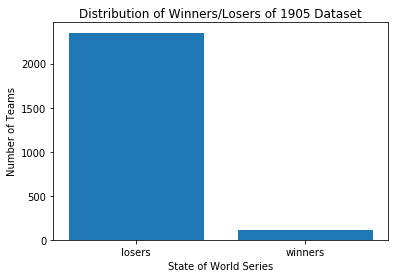

In [14]:
# graph 1905.
plt.bar(["losers", "winners"], [len(losers_1905), len(winners_1905)])
plt.ylabel("Number of Teams")
plt.xlabel("State of World Series")
plt.title("Distribution of Winners/Losers of 1905 Dataset");

In [18]:
# percent 1905.
percent_1905 = round((len(winners_1905)/((len(winners_1905) + len(losers_1905)))) * 100, 2)
percent_1905

4.59

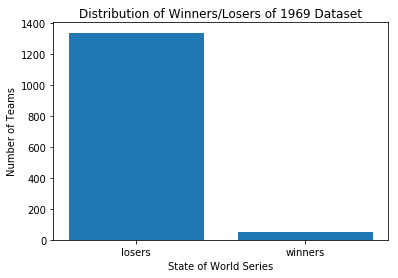

In [15]:
# graph 1969.
plt.bar(["losers", "winners"], [len(losers_1969), len(winners_1969)])
plt.ylabel("Number of Teams")
plt.xlabel("State of World Series")
plt.title("Distribution of Winners/Losers of 1969 Dataset");

In [19]:
# percent 1969.
percent_1969 = round((len(winners_1969)/((len(winners_1969) + len(losers_1969)))) * 100, 2)
percent_1969

3.54

### STEP3: Graph percent change for features.

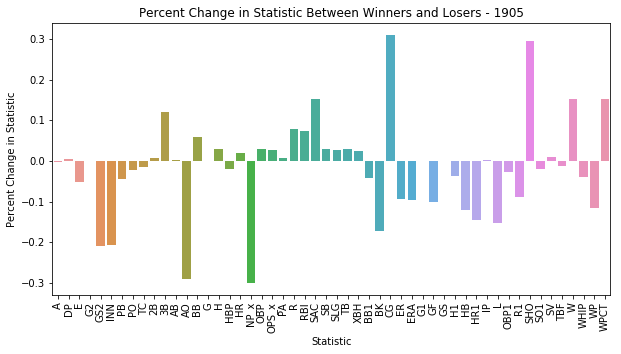

In [30]:
# 1905.
grouped_1905 = team_data_1905.groupby("winners")
percent_change_1905 = grouped_1905.mean().pct_change().iloc[1, :]
percent_change_1905.drop({"year"}, axis=0, inplace=True)

ax = plt.figure(figsize=[10, 5])
ax = sns.barplot(x=percent_change_1905.index, y=percent_change_1905)

plt.xticks(rotation=90)
plt.ylabel("Percent Change in Statistic")
plt.xlabel("Statistic")
plt.title("Percent Change in Statistic Between Winners and Losers - 1905")
plt.show()

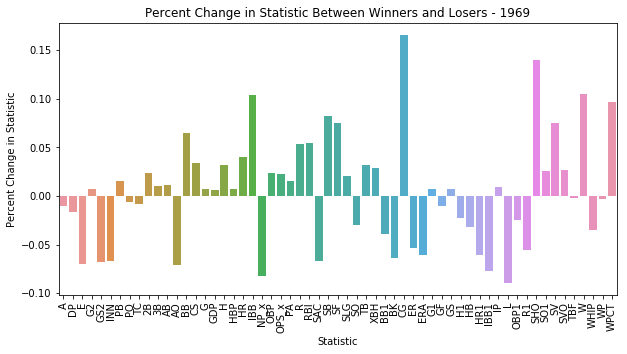

In [33]:
# 1969.
grouped_1969 = team_data_1969.groupby("winners")
percent_change_1969 = grouped_1969.mean().pct_change().iloc[1, :]
percent_change_1969.drop({"year"}, axis=0, inplace=True)

ax = plt.figure(figsize=[10, 5])
ax = sns.barplot(x=percent_change_1969.index, y=percent_change_1969)

plt.xticks(rotation=90)
plt.ylabel("Percent Change in Statistic")
plt.xlabel("Statistic")
plt.title("Percent Change in Statistic Between Winners and Losers - 1969")
plt.show()